#  Import Libraries

In [1]:
import numpy as np 
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.13.1


# Load Data

In [3]:
import os
print(os.listdir("E:/MS/Deep Learning/Assignments/Assignment1/Bike-Sharing-Dataset"))


['day.csv', 'hour.csv', 'Readme.txt']


In [4]:
hourData = pd.read_csv("E:/MS/Deep Learning/Assignments/Assignment1/Bike-Sharing-Dataset/hour.csv")

In [5]:
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hourData.shape[0]

17379

In [7]:
hourData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#  Lets check the categorical variables now. using pd.get_dummies()

In [8]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

BikeHourDF = pd.DataFrame.copy(hourData)
dummy_columns = ["season",     # season (1:springer, 2:summer, 3:fall, 4:winter)
                 "yr",          # year (0: 2011, 1:2012)
                 "mnth",        # month ( 1 to 12)
                 "hr",          # hour (0 to 23)
                 "weekday",     # weekday : day of the week
                 "weathersit"   # weathersit : 
                                 # - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                 # - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                 # - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                 # - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                ]
for dummy_column in dummy_columns:
    BikeHourDF = generate_dummies(BikeHourDF, dummy_column)

In [9]:
BikeHourDF.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


In [10]:
BikeHourDF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

In [11]:
for dummy_column in dummy_columns:
    del BikeHourDF[dummy_column]

BikeHourDF.columns

Index(['instant', 'dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

In [12]:
BikeHourDF.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [13]:
BikeHourDF.shape[0]

17379

# PreProcess Data

In [14]:
def preprocess_features(BikeHourDF):
  """Prepares input features from concrete slump test data set.

  Args:
    concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = BikeHourDF[
    [ "holiday", "workingday", "temp", "atemp", "hum",
       "windspeed","season_1", "season_2",
       "season_3", "season_4", "yr_0", "yr_1", "mnth_1", "mnth_2", "mnth_3",
       "mnth_4", "mnth_5", "mnth_6", "mnth_7", "mnth_8", "mnth_9", "mnth_10",
       "mnth_11", "mnth_12", "hr_0", "hr_1", "hr_2", "hr_3", "hr_4", "hr_5",
       "hr_6", "hr_7", "hr_8", "hr_9", "hr_10", "hr_11", "hr_12", "hr_13",
       "hr_14", "hr_15", "hr_16", "hr_17", "hr_18", "hr_19", "hr_20", "hr_21",
       "hr_22", "hr_23", "weekday_0", "weekday_1", "weekday_2", "weekday_3",
       "weekday_4", "weekday_5", "weekday_6", "weathersit_1", "weathersit_2",
       "weathersit_3", "weathersit_4"]]
    
  processed_features = selected_features.copy()
  processed_features = preprocessing.normalize(processed_features)
  
  return processed_features

def preprocess_targets(BikeHourDF):
  """Prepares target features (i.e., labels) from  housing data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = BikeHourDF["cnt"]
  return output_targets

# Train/Validation Split

In [15]:
# Choose the first 13903 examples for training.
training_examples = preprocess_features(BikeHourDF.head(13903))
training_targets = preprocess_targets(BikeHourDF.head(13903))


# Choose the 3476 examples for validation.
validation_examples = preprocess_features(BikeHourDF.tail(3476))
validation_targets = preprocess_targets(BikeHourDF.tail(3476))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,...,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,0.027404,0.684457,0.499170,0.478017,0.622996,0.194097,0.286269,0.317126,0.243113,0.153492,...,0.143782,0.142056,0.141768,0.141624,0.142631,0.144429,0.665396,0.249443,0.084946,0.000216
std,0.163264,0.464749,0.197716,0.176614,0.198194,0.123023,0.452033,0.465374,0.428978,0.360474,...,0.350881,0.349120,0.348825,0.348677,0.349709,0.351537,0.471869,0.432706,0.278811,0.014688
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340000,0.333300,0.470000,0.104500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.500000,0.484800,0.620000,0.194000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.660000,0.621200,0.790000,0.283600,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Validation examples summary:


,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.0,3476.000000,3476.000000,...,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.0
mean,0.034235,0.675777,0.488257,0.466807,0.644160,0.174103,0.075374,0.0,0.321059,0.603567,...,0.138090,0.137514,0.144994,0.144419,0.144994,0.144994,0.621979,0.309551,0.068470,0.0
std,0.181858,0.468151,0.170108,0.150995,0.169224,0.118242,0.264032,0.0,0.466950,0.489227,...,0.345044,0.344439,0.352146,0.351565,0.352146,0.352146,0.484963,0.462375,0.252586,0.0
min,0.000000,0.000000,0.140000,0.151500,0.160000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.340000,0.333300,0.510000,0.104500,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.480000,0.469700,0.650000,0.164200,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.640000,0.606100,0.780000,0.253700,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,0.900000,0.787900,1.000000,0.656700,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Training targets summary:


count    13903.000000
mean       174.639143
std        166.955414
min          1.000000
25%         37.000000
50%        130.000000
75%        258.000000
max        957.000000
Name: cnt, dtype: float64

Validation targets summary:


count    3476.000000
mean      248.754603
std       220.516539
min         1.000000
25%        53.000000
50%       205.000000
75%       367.000000
max       977.000000
Name: cnt, dtype: float64

In [16]:
training_examples.shape

(13903, 59)

# Define Model & compile

In [38]:
#Build Model
baseline_model = keras.Sequential([
    keras.layers.Dense(30, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(20, activation = tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer()

baseline_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

In [34]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                1800      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,441
Trainable params: 2,441
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Fit Model

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
tf.set_random_seed(1)

# Store training stats
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [23]:
print(b_history.history['val_mean_absolute_error'])

[214.40154, 173.78175, 157.28279, 147.21492, 136.79051, 127.056244, 120.43086, 113.39747, 107.93371, 105.21971, 103.26306, 100.670395, 100.62986, 98.7293, 97.16977, 97.10961, 94.42133, 94.114204, 91.48647, 90.98971, 90.04955, 88.53728, 85.83049, 84.38358, 83.511375, 82.9058, 80.66547, 79.9724, 78.26025, 77.68449, 76.1317, 75.27533, 74.44779, 72.8462, 72.23116, 71.733894, 69.56191, 68.83854, 68.3583, 66.77609, 66.456314, 65.775406, 65.32486, 64.24272, 63.719105, 63.052216, 61.865242, 61.353676, 60.794067, 60.63999, 60.222736, 59.144264, 58.509983, 58.148586, 58.10808, 57.31011, 56.865295, 56.341663, 56.19043, 55.45165, 55.471703, 55.213917, 55.039383, 54.459454, 54.820217, 54.171074, 53.86355, 53.530216, 53.517555, 53.560642, 53.147438, 53.305775, 53.106106, 52.78613, 53.016743, 52.286095, 52.350235, 52.22405, 52.06456, 53.152767, 52.353455, 52.160282, 51.702755, 52.086464, 52.39321, 51.94644, 51.67742, 51.871002, 51.767303, 51.863758, 51.651825, 51.461193, 52.07078, 52.07316, 52.65577,

In [37]:
print(min(b_history.history['val_mean_absolute_error']))

51.664593


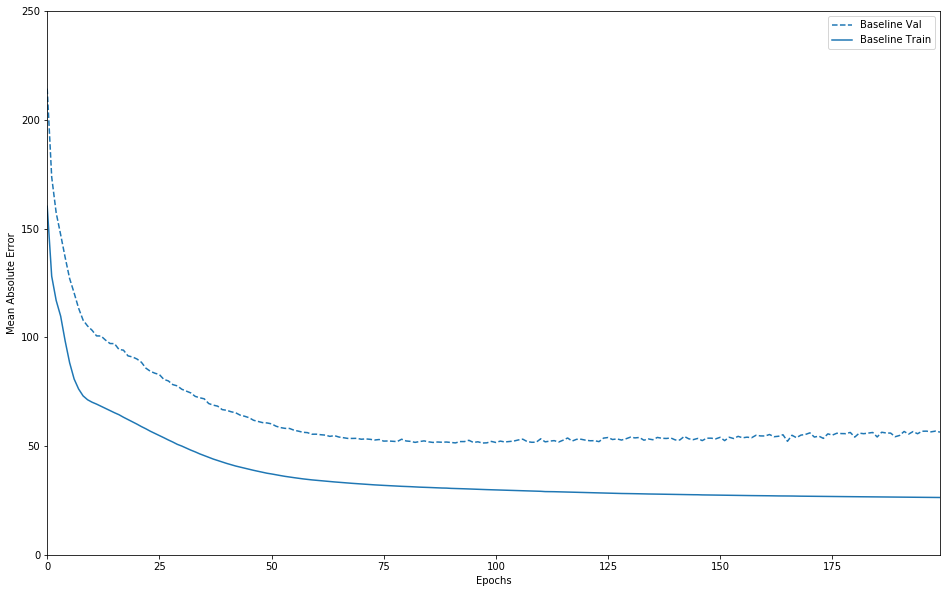

In [31]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
               '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,250])

plot_history([('baseline', b_history)])